# SKLEARN HOUSING DATA
## Evaluate Models Notebook

In [15]:
import os
import pandas as pd
import seaborn as sns
from joblib import load

In [6]:
data_path = os.path.join('..', 'data')

In [7]:
X_test_path = os.path.join(data_path, 'X_test.csv')

In [8]:
y_test_path = os.path.join(data_path, 'y_test.csv')

In [9]:
X_test = pd.read_csv(X_test_path)
y_test = pd.read_csv(y_test_path)

In [10]:
models_path = os.path.join('..', 'models')

In [11]:
lr_model_path = os.path.join(models_path, 'lr.pkl')

In [12]:
lr = load(lr_model_path)

In [13]:
lr_preds = lr.predict(X_test)

In [14]:
lr_preds

array([[28.53469469],
       [36.6187006 ],
       [15.63751079],
       [25.5014496 ],
       [18.7096734 ],
       [23.16471591],
       [17.31011035],
       [14.07736367],
       [23.01064388],
       [20.54223482],
       [24.91632351],
       [18.41098052],
       [-6.52079687],
       [21.83372604],
       [19.14903064],
       [26.0587322 ],
       [20.30232625],
       [ 5.74943567],
       [40.33137811],
       [17.45791446],
       [27.47486665],
       [30.2170757 ],
       [10.80555625],
       [23.87721728],
       [17.99492211],
       [16.02608791],
       [23.268288  ],
       [14.36825207],
       [22.38116971],
       [19.3092068 ],
       [22.17284576],
       [25.05925441],
       [25.13780726],
       [18.46730198],
       [16.60405712],
       [17.46564046],
       [30.71367733],
       [20.05106788],
       [23.9897768 ],
       [24.94322408],
       [13.97945355],
       [31.64706967],
       [42.48057206],
       [17.70042814],
       [26.92507869],
       [17

In [16]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, lr_preds)

0.7266979480125311

In [20]:
y_test['lr_preds'] = lr_preds

In [21]:
y_test

,target,lr_preds
0,23.6,28.534695
1,32.4,36.618701
2,13.6,15.637511
3,22.8,25.501450
4,16.1,18.709673
...,...,...
162,21.7,21.057443
163,23.1,25.017346
164,22.8,27.654619
165,21.0,20.702058


In [22]:
y_test.corr()

,target,lr_preds
target,1.000000,0.854426
lr_preds,0.854426,1.000000


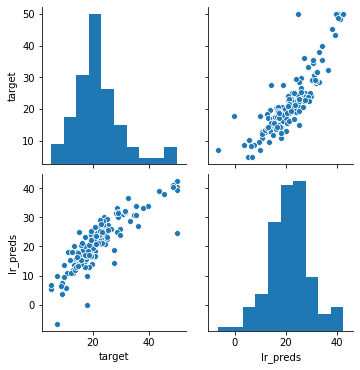

In [23]:
sns.pairplot(y_test)